In [12]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from learn import *

Train on full dataset for several epochs

In [2]:
%%time
%run script 0 --gpu_start=0 --num_gpus=2 --bs=64 --lr 1e-7 --num_slice=9 \
    --use_wd_sched --wd 0.025 --n_cycles 3 --model_name unet
# --start --learn

CPU times: user 1.92 s, sys: 1.25 s, total: 3.16 s
Wall time: 4.28 s


In [3]:
data = None

In [4]:
device_ids = [0, 1, 2, 3, 4, 5, 6]
lr = 1e-3
lrs = np.array([lr / 9, lr])
wd = args.wd
wds = np.array([wd / 3, wd])
use_wd_sched = True
is_eval, is_pred = False, False
bs = 90

In [4]:
is_eval, is_pred = False, False
learn, denorm, data = learner_on_dataset(datapath, bs, device_ids, num_workers=8, model_name=model_name,
                                         debug=False, data=data, num_slice=num_slice, sz=sz,
                                         is_eval=is_eval, is_pred=is_pred, rescale=args.rescale)

HBox(children=(IntProgress(value=0, description='gt', max=1156), HTML(value='')))

HBox(children=(IntProgress(value=0, description='gt', max=2695), HTML(value='')))


Data finished loading: data/train/AOI_2_Vegas_Train


In [8]:
learn.freeze_to(1)

In [4]:
learn.lr_find()

 60%|██████    | 79/131 [01:25<00:56,  1.08s/it, loss=14]  

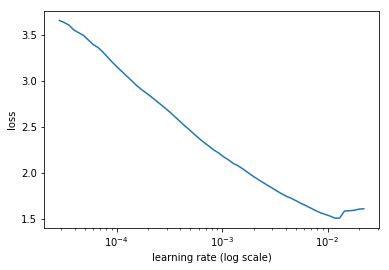

In [5]:
learn.sched.plot()

  0%|          | 0/131 [00:00<?, ?it/s]


Exception in thread Thread-242:
Traceback (most recent call last):
  File "/home/twofyw/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/twofyw/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/twofyw/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   mask_acc   fscore     jaccard_coef_par 
    0      0.758      0.664322   0.89644    0.408171   0.579849  
    1      0.710016   0.623703   0.904384   0.402822   0.593979  
    2      0.673139   0.602182   0.901446   0.408063   0.609044  
    3      0.726187   0.684086   0.877162   0.415407   0.58162   
    4      0.685859   0.602466   0.907109   0.402663   0.602523  
    5      0.665955   0.590601   0.907966   0.403434   0.609698  
    6      0.648753   0.587226   0.9039     0.407523   0.616477  



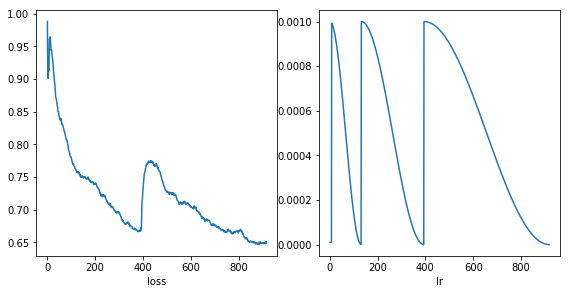

In [10]:
lr = 1e-3
lrs = np.array([lr / 9, lr])
wd = args.wd
wds = np.array([wd / 3, wd])
use_wd_sched = True

train_and_plot(learn, 0, 'ternaus-full', lrs = lrs, n_cycles=3, wds=wds, use_wd_sched=use_wd_sched,
    cycle_len=1, cycle_mult=2, best_save_name='ternaus-full')

epoch      trn_loss   val_loss   mask_acc   fscore     jaccard_coef_par 
    0      0.642775   0.577002   0.906508   0.405699   0.619355  
    1      0.635444   0.577996   0.904137   0.407534   0.62201   
    2      0.630283   0.567566   0.907768   0.405712   0.624259  
    3      0.631093   0.586557   0.916639   0.397663   0.604746  
    4      0.623047   0.552206   0.909213   0.406765   0.63267   
    5      0.615055   0.554318   0.907737   0.40618    0.632466  
    6      0.617787   0.549161   0.910359   0.405578   0.633225  



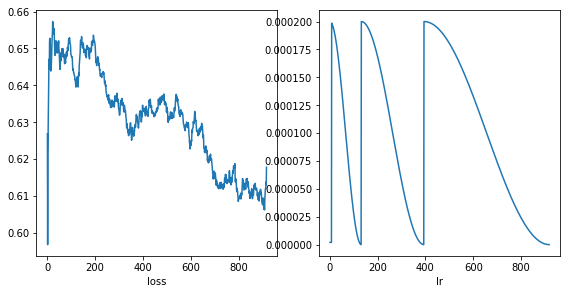

In [12]:
train_and_plot(learn, 0, 'ternaus-full', lrs = lrs, n_cycles=3, wds=wds, use_wd_sched=use_wd_sched,
    cycle_len=1, cycle_mult=2, best_save_name='ternaus-full')

In [5]:
learn.load('ternaus-full_0')

HBox(children=(IntProgress(value=0, description='Epoch', max=15), HTML(value='')))

epoch      trn_loss   val_loss   mask_acc   fscore     jaccard_coef_par 
    0      0.658742   0.55847    0.909609   0.403791   0.629685  
    1      0.623284   0.494598   0.919657   0.399699   0.656435  
    2      0.53288    0.46078    0.923136   0.399092   0.675652  
    3      0.574788   0.471784   0.930074   0.399013   0.661574  
    4      0.550459   0.498461   0.911026   0.400387   0.660875  
    5      0.491887   0.412617   0.929277   0.399193   0.69949   
    6      0.472387   0.40348    0.931393   0.397507   0.703771  
    7      0.568333   0.437055   0.930563   0.399983   0.684138  
    8      0.538684   0.444659   0.924362   0.407667   0.687113  
    9      0.501822   0.402994   0.931588   0.397064   0.704193  
    10     0.504215   0.419881   0.936705   0.392909   0.688636  
    11     0.478197   0.420972   0.923679   0.396888   0.699046  
    12     0.453679   0.375339   0.93609    0.395985   0.717711  
    13     0.44243    0.374519   0.934924   0.396802   0.719394  
   

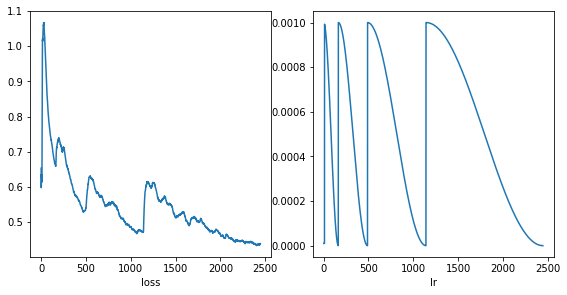

In [6]:
lr = 1e-3
lrs = np.array([lr / 9, lr])
learn.unfreeze()
train_and_plot(learn, 1, 'ternaus-full', lrs = lrs, n_cycles=4, wds=wds, use_wd_sched=use_wd_sched,
    cycle_len=1, cycle_mult=2, best_save_name='ternaus-full')

Paris

In [8]:
data = None
bs = 90
datapath = datapaths[1]
learn, denorm, data = learner_on_dataset(datapath, bs, device_ids, num_workers=8, model_name=model_name,
                                         debug=False, data=data, num_slice=25, sz=sz,
                                         is_eval=is_eval, is_pred=is_pred, rescale=args.rescale)

HBox(children=(IntProgress(value=0, description='gt', max=345), HTML(value='')))

HBox(children=(IntProgress(value=0, description='gt', max=803), HTML(value='')))


Data finished loading: data/train/AOI_3_Paris_Train


In [5]:
learn.load('ternaus-full_0')

HBox(children=(IntProgress(value=0, description='Epoch', max=15), HTML(value='')))

epoch      trn_loss   val_loss   mask_acc   fscore     jaccard_coef_par 
    0      1.762044   1.267559   0.851804   0.325156   0.40553   
    1      1.35513    0.986139   0.862064   0.346059   0.450126  
    2      1.179272   0.963186   0.863682   0.345278   0.456087  
    3      1.079979   0.88089    0.876858   0.340705   0.474124  
    4      1.005078   0.851583   0.887622   0.337943   0.483274  
    5      0.95597    0.887099   0.892946   0.334199   0.463122  
    6      0.933341   0.847975   0.890643   0.336256   0.480348  
    7      0.927475   0.865585   0.892413   0.334782   0.472626  
    8      0.911398   0.816454   0.890756   0.337107   0.49173   
    9      0.898667   0.800376   0.887213   0.339719   0.501528  
    10     0.886594   0.829416   0.895059   0.335294   0.485398  
    11     0.876868   0.795214   0.894095   0.335839   0.500639  
    12     0.86899    0.788729   0.8913     0.337948   0.505232  
    13     0.864238   0.812105   0.895897   0.334953   0.491098  
   

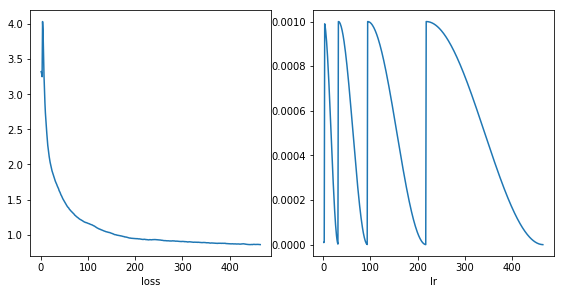

In [13]:
lr = 1e-3
lrs = np.array([lr/3, lr])
train_and_plot(learn, 2, 'ternaus-full', lrs = lrs, n_cycles=4, wds=wds, use_wd_sched=use_wd_sched,
    cycle_len=1, cycle_mult=2, best_save_name='ternaus-full')

Shanghai

In [6]:
data = None
datapath = datapaths[2]
learn, denorm, data = learner_on_dataset(datapath, bs, device_ids, num_workers=8, model_name=model_name,
                                         debug=False, data=data, num_slice=9, sz=sz,
                                         is_eval=is_eval, is_pred=is_pred, rescale=args.rescale)

HBox(children=(IntProgress(value=0, description='gt', max=1375), HTML(value='')))

HBox(children=(IntProgress(value=0, description='gt', max=3207), HTML(value='')))


Data finished loading: data/train/AOI_4_Shanghai_Train


In [7]:
learn.load('ternaus-full')

HBox(children=(IntProgress(value=0, description='Epoch', max=15), HTML(value='')))

epoch      trn_loss   val_loss   mask_acc   fscore     jaccard_coef_par 
    0      0.880828   0.820738   0.914164   0.249159   0.466281  
    1      0.895368   0.802103   0.915568   0.249129   0.474077  
    2      0.835185   0.780013   0.915427   0.248903   0.485374  
    3      0.888491   0.809266   0.916047   0.249372   0.470002  
    4      0.854802   0.849288   0.923902   0.246544   0.45026   
    5      0.831974   0.770364   0.91827    0.248201   0.490573  
    6      0.823162   0.758483   0.917846   0.249045   0.494054  
    7      0.869487   0.89757    0.924361   0.246812   0.43035   
    8      0.854469   0.805948   0.903895   0.249067   0.472327  
    9      0.840387   0.807756   0.900254   0.253075   0.480503  
    10     0.849476   0.812621   0.893871   0.254775   0.486478  
    11     0.828992   0.762947   0.90862    0.248905   0.497501  
    12     0.814201   0.750065   0.910046   0.250849   0.504956  
    13     0.805249   0.74142    0.924456   0.248152   0.498889  
   

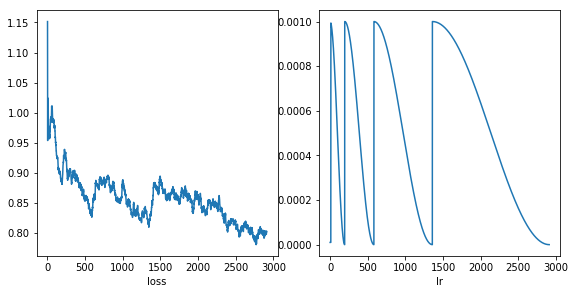

In [8]:
train_and_plot(learn, 3, 'ternaus-full', lrs = lrs, n_cycles=4, wds=wds, use_wd_sched=use_wd_sched,
    cycle_len=1, cycle_mult=2, best_save_name='ternaus-full')

Khartoum

In [ ]:
data = None

In [5]:
datapath = datapaths[3]
bs = 90
learn, denorm, data = learner_on_dataset(datapath, bs, device_ids, num_workers=8, model_name=model_name,
                                         debug=False, data=data, num_slice=25, sz=sz,
                                         is_eval=is_eval, is_pred=is_pred, rescale=args.rescale)

HBox(children=(IntProgress(value=0, description='gt', max=304), HTML(value='')))

HBox(children=(IntProgress(value=0, description='gt', max=708), HTML(value='')))


Data finished loading: data/train/AOI_5_Khartoum_Train


In [6]:
learn.load('ternaus-full')

HBox(children=(IntProgress(value=0, description='Epoch', max=15), HTML(value='')))

epoch      trn_loss   val_loss   mask_acc   fscore     jaccard_coef_par 
    0      0.930971   0.843498   0.895731   0.344979   0.484598  
    1      0.875942   0.782383   0.902176   0.340464   0.504203  
    2      0.821697   0.748755   0.900142   0.342464   0.521866  
    3      0.814552   0.724652   0.896214   0.344028   0.533971  
    4      0.808141   0.735265   0.905959   0.338715   0.522753  
    5      0.783981   0.714351   0.903539   0.339293   0.534737  
    6      0.770008   0.70492    0.902748   0.34072    0.538922  
    7      0.893063   0.762337   0.892574   0.344587   0.518638  
    8      0.751407   0.645512   0.913679   0.338032   0.559338  
    9      0.697542   0.604511   0.907482   0.343564   0.58764   
    10     0.684081   0.602787   0.913103   0.33947    0.584637  
    11     0.666285   0.598148   0.913544   0.339779   0.586652  
    12     0.656551   0.595309   0.91534    0.338372   0.586817  
    13     0.649409   0.592772   0.913019   0.340015   0.590352  
   

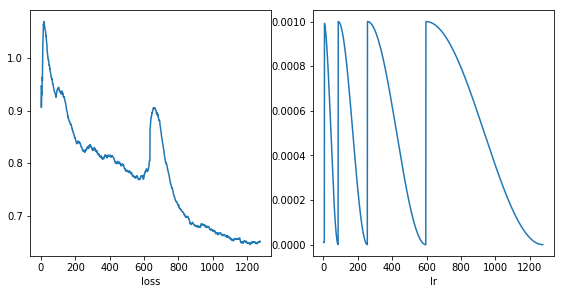

In [7]:
train_and_plot(learn, 4, 'ternaus-full', lrs = lrs, n_cycles=4, wds=wds, use_wd_sched=use_wd_sched,
    cycle_len=1, cycle_mult=2, best_save_name='ternaus-full')

In [1]:
%%time
%run script 0 --gpu_start=2 --num_gpus=4 --bs=64 --lr 1e-3 --num_slice=25 \
    --use_wd_sched --wd 0.025 --n_cycles 5 --model_name unet --learn --start --load_starter ternaus-full

HBox(children=(IntProgress(value=0, description='gt', max=1156), HTML(value='')))

HBox(children=(IntProgress(value=0, description='gt', max=2695), HTML(value='')))


epoch      trn_loss   val_loss   mask_acc   jaccard_coef_par 
    0      0.564668   0.489656   0.922193   0.659245  
    1      0.491048   0.44714    0.926593   0.681097         
    2      0.557642   0.517856   0.91198    0.652362         
    3      0.500573   0.481888   0.912748   0.676307         
    4      0.459498   0.391733   0.933561   0.709919         
    5      0.441265   0.380524   0.935687   0.714984         
    6      0.62853    0.734285   0.862023   0.570466         
    7      0.510673   0.473407   0.916427   0.676612         
    8      0.518976   0.454783   0.920325   0.683902         
    9      0.491299   0.446265   0.936066   0.678442         
 28%|██▊       | 127/452 [02:21<06:01,  1.11s/it, loss=0.477]

KeyboardInterrupt: 

CPU times: user 22h 12min 37s, sys: 2h 4min 8s, total: 1d 16min 45s
Wall time: 2h 20min 5s


Another 30 epochs here not recorded

In [1]:
%%time
%run script 0 --gpu_start=2 --num_gpus=3 --bs=80 --lr 1e-4 --num_slice=9 \
    --use_wd_sched --wd 0.025 --n_cycles 4 --model_name unet --learn --start

HBox(children=(IntProgress(value=0, description='gt', max=1156), HTML(value='')))

HBox(children=(IntProgress(value=0, description='gt', max=2695), HTML(value='')))


Data finished loading: data/train/AOI_2_Vegas_Train


HBox(children=(IntProgress(value=0, description='Epoch', max=30), HTML(value='')))

epoch      trn_loss   val_loss   mask_acc   jaccard_coef_par 
    0      0.418425   0.344348   0.938957   0.736003  
    1      0.408385   0.337314   0.941453   0.737837         
    2      0.41419    0.342005   0.939155   0.737345         
    3      0.416593   0.338018   0.941319   0.73754          
    4      0.407181   0.338254   0.940316   0.738503         
    5      0.407349   0.336416   0.94152    0.738232         
    6      0.411591   0.340778   0.940822   0.735986         
    7      0.426251   0.37267    0.930808   0.725844         
    8      0.417844   0.33759    0.942126   0.736735         
    9      0.41222    0.341756   0.938982   0.738128         
    10     0.405517   0.335222   0.941475   0.739254         
    11     0.404928   0.332368   0.942725   0.739382         
    12     0.409516   0.333599   0.941788   0.739882         
    13     0.411329   0.333301   0.941843   0.740024         
    14     0.421416   0.355073   0.936438   0.732494         
    15     0.40

In [ ]:
lrs = np.array(lrs) / 10

HBox(children=(IntProgress(value=0, description='Epoch', max=15), HTML(value='')))

epoch      trn_loss   val_loss   mask_acc   jaccard_coef_par 
    0      0.400484   0.327414   0.942329   0.743546  
    1      0.401807   0.327722   0.942125   0.743569         
    2      0.401112   0.326909   0.942743   0.743239         
    3      0.41622    0.32754    0.942057   0.743999         
    4      0.400742   0.327423   0.942424   0.74333          
    5      0.398883   0.327781   0.942243   0.743408         
    6      0.399912   0.32659    0.942872   0.743371         
    7      0.39598    0.325024   0.943307   0.74395          
    8      0.398028   0.326971   0.942329   0.743801         
    9      0.3992     0.326177   0.94294    0.74357          
    10     0.397578   0.325702   0.943157   0.743684         
    11     0.392842   0.32653    0.942798   0.743645         
    12     0.396419   0.325581   0.942909   0.74411          
    13     0.399751   0.32589    0.942802   0.744004         
    14     0.396071   0.325626   0.942986   0.743936         



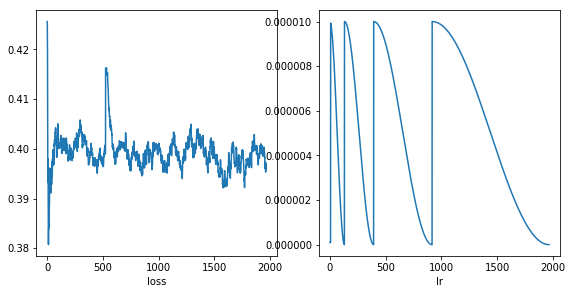

In [4]:
train_and_plot(learn, 0, 'unet-vegas', lrs = lrs, n_cycles=4, wds=wds, use_wd_sched=use_wd_sched,
    cycle_len=1, cycle_mult=2, best_save_name='unet-vegas')

Tested at this point

In [7]:
%%time
train_and_plot(learn, 1, 'unet-vegas', lrs = lrs, n_cycles=4, wds=wds, use_wd_sched=use_wd_sched,
    cycle_len=1, cycle_mult=2, best_save_name='unet-vegas')

HBox(children=(IntProgress(value=0, description='Epoch', max=15), HTML(value='')))

epoch      trn_loss   val_loss   mask_acc   jaccard_coef_par 
    0      0.394653   0.324245   0.943127   0.744701  
    1      0.397219   0.322838   0.94397    0.744531         
    2      0.398845   0.324307   0.943053   0.744734         
    3      0.399918   0.324454   0.942778   0.745049         
    4      0.396083   0.325845   0.942533   0.744128         
    5      0.39329    0.32463    0.942792   0.744938         
    6      0.386345   0.32385    0.943356   0.744634         
    7      0.389072   0.324015   0.944811   0.742498         
    8      0.394637   0.323617   0.943217   0.744968         
    9      0.396639   0.322914   0.943397   0.745471         
    10     0.395588   0.325739   0.942579   0.744282         
 21%|██▏       | 28/131 [00:42<02:36,  1.52s/it, loss=0.395]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
lrs /= 5

In [ ]:
%%time
train_and_plot(learn, 2, 'unet-vegas', lrs = lrs, n_cycles=6, wds=wds, use_wd_sched=use_wd_sched,
    cycle_len=1, cycle_mult=2, best_save_name='unet-vegas')

HBox(children=(IntProgress(value=0, description='Epoch', max=63), HTML(value='')))

epoch      trn_loss   val_loss   mask_acc   jaccard_coef_par 
    0      0.39506    0.323555   0.943294   0.744918  
    1      0.394365   0.323463   0.943406   0.74483          
    2      0.394751   0.323537   0.943378   0.744813         
    3      0.396609   0.323757   0.943231   0.744862         
    4      0.394367   0.32359    0.943301   0.74488          
    5      0.392578   0.323741   0.943229   0.744858         
    6      0.400637   0.323757   0.943212   0.744876         
    7      0.395666   0.323455   0.943362   0.7449           
    8      0.396845   0.323765   0.943176   0.744951         
    9      0.400331   0.323514   0.943302   0.744973         
    10     0.395578   0.323697   0.943216   0.744952         
 22%|██▏       | 29/131 [00:42<02:29,  1.46s/it, loss=0.398]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



    26     0.399414   0.323779   0.943209   0.744894         
    27     0.394563   0.323722   0.943234   0.744901         
    28     0.397392   0.323709   0.943243   0.744897         
    29     0.40597    0.323692   0.943255   0.744893         
    30     0.395957   0.323701   0.94325    0.744894         
    31     0.408221   0.324029   0.943056   0.74493          
    32     0.394008   0.323925   0.943102   0.744973         
    33     0.400782   0.323653   0.943275   0.744892         
    34     0.399822   0.323676   0.943312   0.744815         
    35     0.39582    0.323328   0.943463   0.744868         
    36     0.395788   0.323496   0.943257   0.745052         
    37     0.400316   0.323535   0.943265   0.745018         
  0%|          | 0/131 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



    53     0.393471   0.323537   0.943271   0.744964         
    54     0.391548   0.32359    0.943244   0.74496          
    55     0.392974   0.323536   0.943261   0.744978         
    56     0.399463   0.323549   0.943256   0.744976         
    57     0.399467   0.323561   0.943249   0.74498          
    58     0.39731    0.323587   0.943236   0.744978         
    59     0.393053   0.323575   0.943244   0.744974         
